<a href="https://colab.research.google.com/github/narutaku0914/KIKAGAKU/blob/master/kikagaku_ir2accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNの精度向上

### ベースモデルの作成

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# DataSetの準備
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


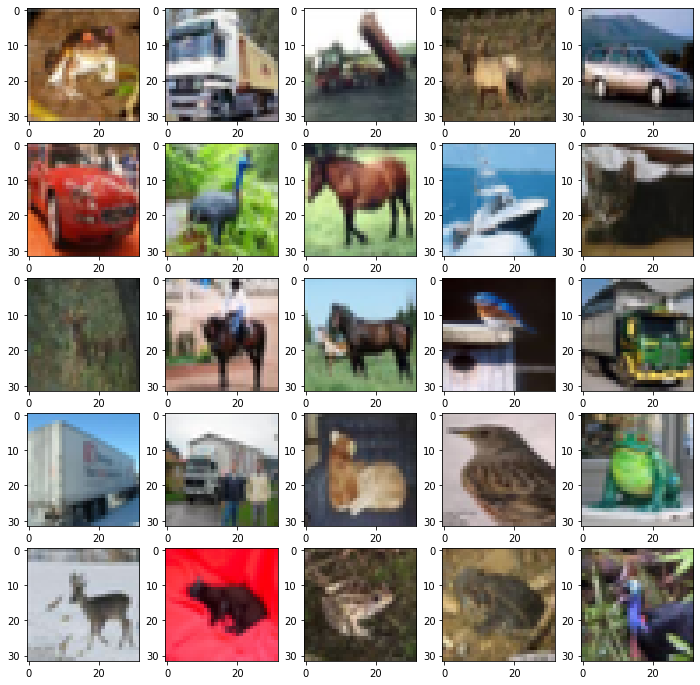

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])

In [ ]:
# 正規化
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
import os
import random

def reset_seed(seed=0):
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras import models, layers

# seedの固定
reset_seed(0)

# モデルの定義
model = models.Sequential([
                            layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(128, (3,3), padding='same', activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(128, activation='relu'),
                            layers.Dense(10, activation='softmax')
])

# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
# 学習の実行
history = model.fit(x_train, t_train,
                    batch_size=1024,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 3s 65ms/step - loss: 1.9370 - accuracy: 0.2982 - val_loss: 1.6541 - val_accuracy: 0.4118
Epoch 2/50
49/49 [==============================] - 3s 54ms/step - loss: 1.5474 - accuracy: 0.4461 - val_loss: 1.4303 - val_accuracy: 0.4911
Epoch 3/50
49/49 [==============================] - 3s 54ms/step - loss: 1.3894 - accuracy: 0.5067 - val_loss: 1.3321 - val_accuracy: 0.5296
Epoch 4/50
49/49 [==============================] - 3s 54ms/step - loss: 1.2906 - accuracy: 0.5451 - val_loss: 1.2417 - val_accuracy: 0.5576
Epoch 5/50
49/49 [==============================] - 3s 54ms/step - loss: 1.2101 - accuracy: 0.5750 - val_loss: 1.1653 - val_accuracy: 0.5927
Epoch 6/50
49/49 [==============================] - 3s 54ms/step - loss: 1.1292 - accuracy: 0.6055 - val_loss: 1.1598 - val_accuracy: 0.5898
Epoch 7/50
49/49 [==============================] - 3s 53ms/step - loss: 1.0652 - accuracy: 0.6293 - val_loss: 1.0767 - val_accuracy: 0.6235
Epoch 8/50
49

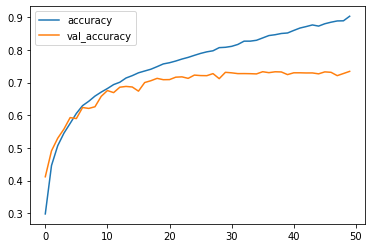

In [ ]:
# 結果の確認
results = pd.DataFrame(history.history)

results[['accuracy', 'val_accuracy']].plot()

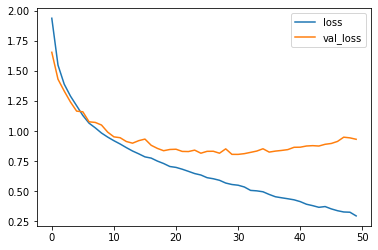

In [ ]:
results[['loss', 'val_loss']].plot()

### 最適化アルゴリズム

精度向上のポイント<br>

*   最適化アルゴリズム
*   ハイパーパラメータ調整





SGD(確率的勾配降下法)<br>
ミニバッチで行う勾配降下、勾配を求め、重みを勾配と逆方向に更新
<br>
更新の際、更新幅の調整のため学習係数(lr: learning ratio)

​w←w−η∇L
​​

Momentum SGD<br>
慣性項を足したもの
\begin{aligned} v &\leftarrow \alpha v - \eta \nabla \mathcal L \\ \mathbf{w} &\leftarrow \mathbf{w} + v \end{aligned}
​
α: ハイパーパラメータ, momentum=の部分<br>
初手で使うことが多い
​​

RMSprop<br>
SGDにおける学習係数を収束(勾配の大きさ)に合わせて変化できる
​​<br>
学習係数: lr, α: rho, ϵ : eps<br>
最適化が困難なアルゴリズム

Adam(Adaptive moment estimation)<br>
Momentum の慣性的な動きと、RMSprop の適応的に学習係数を調整する考えを組み合わせたアルゴリズム<br>
現在、最も評価されているアルゴリズムのひとつ<br>
 ハイパーパラメータの数が非常に多いので、それぞれのハイパーパラメータを適切にチューニングすることがポイント!<br>
 \begin{aligned} t &= t - 1 \\\\ s &\leftarrow \beta_{1} s + ( 1 - \beta_{1} ) \nabla \mathcal L \\\\ r &\leftarrow \beta_{2} r + ( 1 - \beta_{2}) \nabla \mathcal L \odot \nabla \mathcal L \\\\ \hat{s} &\leftarrow \frac{s}{1 - \beta_{1}^t} \\\\ \hat{r} &\leftarrow \frac{r}{1 - \beta_{2}^t} \\\\ \Delta \mathbf{w} &\leftarrow - \frac{\eta}{\sqrt{\hat{r}} + \epsilon} \hat{s} \\\\ \mathbf{w} &\leftarrow \mathbf{w} + \Delta \mathbf{w} \end{aligned}
​
η: lr, β1: beta_1, β2: beta_2, ε: epsilon

### 過学習対策

最良： より多くの学習データを使う<br>
無理なら以下

*   Dropout
*   正則化(Regularization)
*   Early Stopping
*   Batch Normalization

Dropout<br>
Nodeのいくつかを無効にする→次の更新では別のノードを…<br>
→学習時のネットワークの自由度を小さくし、汎化性能を上げる

In [ ]:
# seedの固定
reset_seed(0)

# モデルの定義
model = models.Sequential([
                            layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(128, (3,3), padding='same', activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            #半分を無効化
                            layers.Dropout(0.5), 
                            layers.Dense(128, activation='relu'),
                            layers.Dense(10, activation='softmax')
])

# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# 学習の実行
history = model.fit(x_train, t_train,
                    batch_size=1024,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 3s 56ms/step - loss: 1.9424 - accuracy: 0.2912 - val_loss: 1.6492 - val_accuracy: 0.4062
Epoch 2/50
49/49 [==============================] - 3s 54ms/step - loss: 1.5668 - accuracy: 0.4325 - val_loss: 1.4222 - val_accuracy: 0.4923
Epoch 3/50
49/49 [==============================] - 3s 54ms/step - loss: 1.4144 - accuracy: 0.4903 - val_loss: 1.3022 - val_accuracy: 0.5357
Epoch 4/50
49/49 [==============================] - 3s 54ms/step - loss: 1.3067 - accuracy: 0.5327 - val_loss: 1.2088 - val_accuracy: 0.5725
Epoch 5/50
49/49 [==============================] - 3s 53ms/step - loss: 1.2316 - accuracy: 0.5644 - val_loss: 1.1400 - val_accuracy: 0.6073
Epoch 6/50
49/49 [==============================] - 3s 54ms/step - loss: 1.1550 - accuracy: 0.5920 - val_loss: 1.1013 - val_accuracy: 0.6145
Epoch 7/50
49/49 [==============================] - 3s 53ms/step - loss: 1.1100 - accuracy: 0.6103 - val_loss: 1.0368 - val_accuracy: 0.6412
Epoch 8/50
49

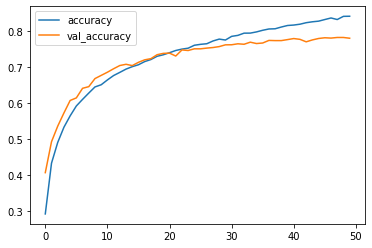

In [ ]:
results = pd.DataFrame(history.history)

results[['accuracy', 'val_accuracy']].plot()

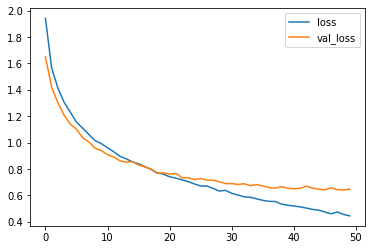

In [ ]:
results[['loss', 'val_loss']].plot()

相当いいのでは？

正則化<br>
パラメータの大きさに対してモデルの複雑さが増すことにペナルティ


学習不足（アンダーフィッティング）となって精度が落ちることもあるので注意<br>
学習不足の原因は様々

*   モデルが十分複雑でない
*   正則化が強すぎる
*   単に学習時間が短すぎる



In [ ]:
from tensorflow.keras import regularizers

reset_seed(0)

model = models.Sequential([
                            layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-2), input_shape=(32,32,3)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-2)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-2)),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(128, activation='relu'),
                            layers.Dense(10, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(lr=1e-3)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, t_train,
                    batch_size=1024,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 3s 56ms/step - loss: 2.6702 - accuracy: 0.2589 - val_loss: 2.1113 - val_accuracy: 0.3809
Epoch 2/50
49/49 [==============================] - 3s 54ms/step - loss: 1.9636 - accuracy: 0.3982 - val_loss: 1.8474 - val_accuracy: 0.4220
Epoch 3/50
49/49 [==============================] - 3s 54ms/step - loss: 1.7865 - accuracy: 0.4425 - val_loss: 1.7320 - val_accuracy: 0.4550
Epoch 4/50
49/49 [==============================] - 3s 54ms/step - loss: 1.7128 - accuracy: 0.4628 - val_loss: 1.6689 - val_accuracy: 0.4736
Epoch 5/50
49/49 [==============================] - 3s 54ms/step - loss: 1.6310 - accuracy: 0.4919 - val_loss: 1.6421 - val_accuracy: 0.4859
Epoch 6/50
49/49 [==============================] - 3s 55ms/step - loss: 1.5840 - accuracy: 0.5085 - val_loss: 1.5569 - val_accuracy: 0.5109
Epoch 7/50
49/49 [==============================] - 3s 54ms/step - loss: 1.5340 - accuracy: 0.5228 - val_loss: 1.4973 - val_accuracy: 0.5391
Epoch 8/50
49

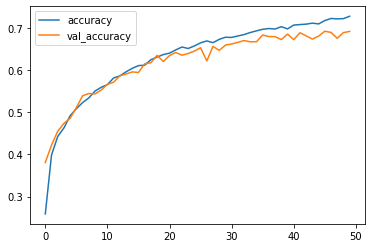

In [ ]:
results = pd.DataFrame(history.history)

results[['accuracy', 'val_accuracy']].plot()

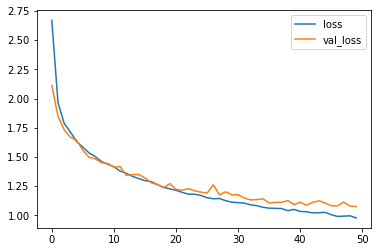

In [ ]:
results[['loss', 'val_loss']].plot()

めちゃめちゃいいぞ！

Early Stopping

In [ ]:
# 原型と同じ
reset_seed(0)

model = models.Sequential([
                            layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(128, (3,3), padding='same', activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(128, activation='relu'),
                            layers.Dense(10, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(lr=1e-3)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(x_train, t_train,
                    batch_size=1024,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, t_test),
                    callbacks=[callback])

Epoch 1/50
49/49 [==============================] - 3s 55ms/step - loss: 0.5388 - accuracy: 0.8155 - val_loss: 0.8333 - val_accuracy: 0.7216
Epoch 2/50
49/49 [==============================] - 3s 54ms/step - loss: 0.5235 - accuracy: 0.8196 - val_loss: 0.8281 - val_accuracy: 0.7208
Epoch 3/50
49/49 [==============================] - 3s 54ms/step - loss: 0.5105 - accuracy: 0.8260 - val_loss: 0.8427 - val_accuracy: 0.7232
Epoch 4/50
49/49 [==============================] - 3s 54ms/step - loss: 0.4976 - accuracy: 0.8288 - val_loss: 0.8356 - val_accuracy: 0.7235
Epoch 5/50
49/49 [==============================] - 3s 55ms/step - loss: 0.4736 - accuracy: 0.8376 - val_loss: 0.8111 - val_accuracy: 0.7317
Epoch 6/50
49/49 [==============================] - 3s 53ms/step - loss: 0.4618 - accuracy: 0.8422 - val_loss: 0.8320 - val_accuracy: 0.7304
Epoch 7/50
49/49 [==============================] - 3s 54ms/step - loss: 0.4618 - accuracy: 0.8418 - val_loss: 0.8385 - val_accuracy: 0.7281
Epoch 8/50
49

val_lossが下がらなくなるタイミングで打ち切り

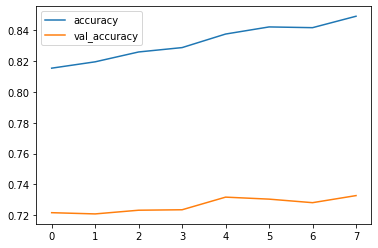

In [ ]:
results = pd.DataFrame(history.history)

results[['accuracy', 'val_accuracy']].plot()

注意点: 一定期間向上しなくても、また向上することがある

Batch Normalization

In [ ]:
reset_seed(0)

model = models.Sequential([
                            layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(128, (3,3), padding='same', activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(128, activation='relu'),
                            layers.Dense(10, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(lr=1e-3)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, t_train,
                    batch_size=1024,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 4s 76ms/step - loss: 1.6835 - accuracy: 0.4278 - val_loss: 3.8425 - val_accuracy: 0.1000
Epoch 2/50
49/49 [==============================] - 3s 68ms/step - loss: 1.1394 - accuracy: 0.5966 - val_loss: 6.3268 - val_accuracy: 0.1000
Epoch 3/50
49/49 [==============================] - 3s 68ms/step - loss: 0.9470 - accuracy: 0.6652 - val_loss: 5.4883 - val_accuracy: 0.1000
Epoch 4/50
49/49 [==============================] - 3s 68ms/step - loss: 0.8111 - accuracy: 0.7167 - val_loss: 4.0638 - val_accuracy: 0.1617
Epoch 5/50
49/49 [==============================] - 3s 68ms/step - loss: 0.6962 - accuracy: 0.7566 - val_loss: 3.3408 - val_accuracy: 0.1986
Epoch 6/50
49/49 [==============================] - 3s 68ms/step - loss: 0.5981 - accuracy: 0.7925 - val_loss: 2.7678 - val_accuracy: 0.2582
Epoch 7/50
49/49 [==============================] - 3s 68ms/step - loss: 0.5151 - accuracy: 0.8242 - val_loss: 2.6428 - val_accuracy: 0.2816
Epoch 8/50
49

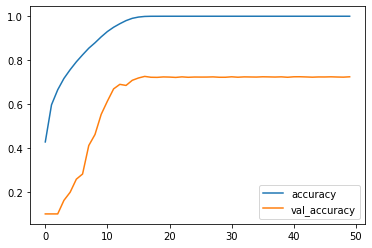

In [ ]:
results = pd.DataFrame(history.history)

results[['accuracy', 'val_accuracy']].plot()

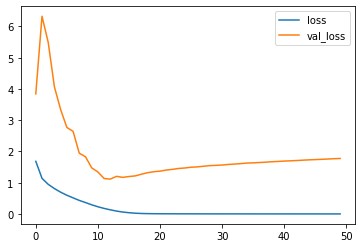

In [ ]:
results[['loss', 'val_loss']].plot()

はじめに比べたらマシに→有効